# Day 08. Exercise 05
# Clustering

## 0. Imports

In [88]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [92]:
df = pd.read_csv('data/regression.csv')
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


In [94]:
df.drop('pageviews', axis=1, inplace=True)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

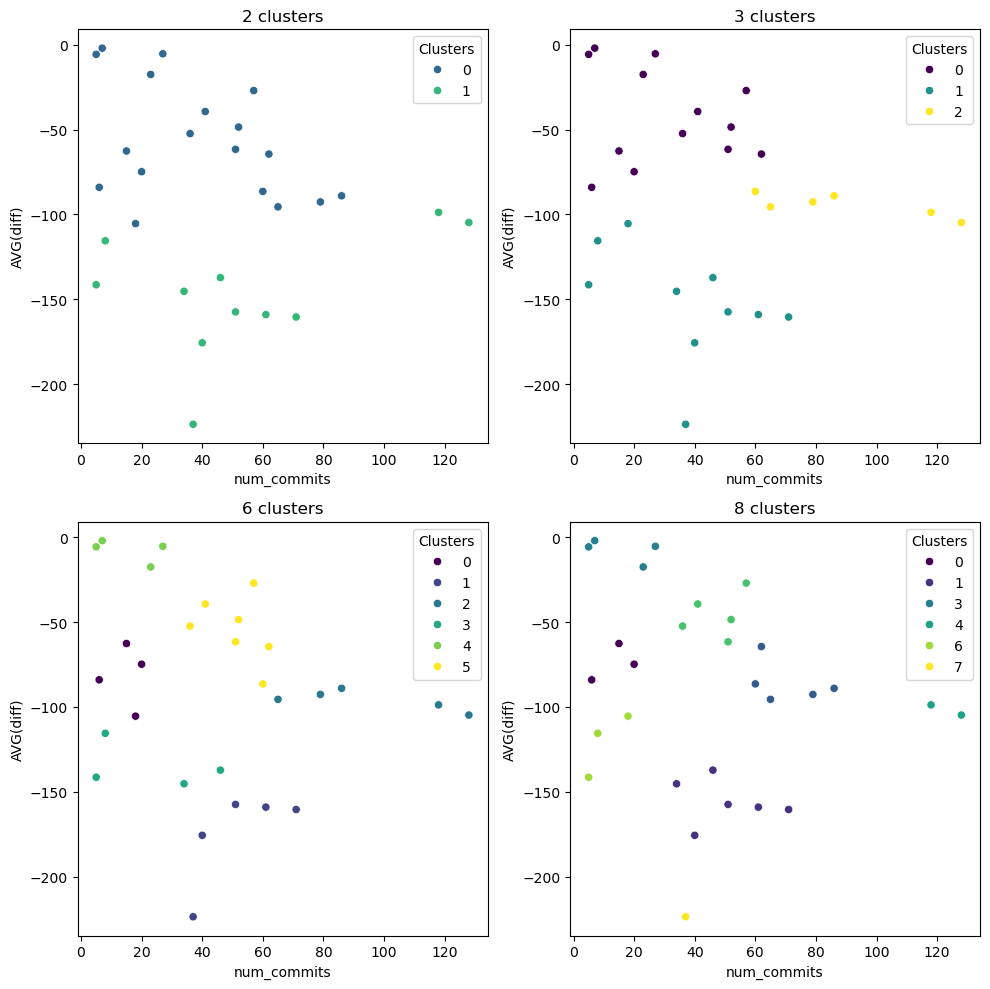

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Определим список количества кластеров для цикла
n_clusters = [2, 3, 6, 8]


for ax, n_cluster in zip(axes.flatten(), n_clusters):    
    km = KMeans(n_clusters=n_cluster, random_state=21)
    y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
    km.cluster_centers_
    
    
    df['Clusters'] = y_predicted
    
    ax.set_title(f'{n_cluster} clusters')
    sns.scatterplot(x='num_commits', y='AVG(diff)', hue='Clusters', data=df, palette='viridis', ax=ax)

plt.tight_layout()
plt.show()

In [99]:
for i in range(2, 11):
    labels=KMeans(n_clusters=i,random_state=21).fit(df[['num_commits', 'AVG(diff)']]).labels_
    print("Silhouette score for k(clusters) = " + str(i) + " is " + str(metrics.silhouette_score(df[['num_commits', 'AVG(diff)']],labels,random_state=21)))

Silhouette score for k(clusters) = 2 is 0.4194920562377423
Silhouette score for k(clusters) = 3 is 0.4454402135233297
Silhouette score for k(clusters) = 4 is 0.41503879936268956
Silhouette score for k(clusters) = 5 is 0.3521030626149593
Silhouette score for k(clusters) = 6 is 0.3954350435152892
Silhouette score for k(clusters) = 7 is 0.39637476619843964
Silhouette score for k(clusters) = 8 is 0.48638087320227846
Silhouette score for k(clusters) = 9 is 0.45376670441174133
Silhouette score for k(clusters) = 10 is 0.4263347607151883


C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

- silhouette_score используется для определения дистанции между кластерами и выбора их оптимального количества. Оптимальное количество кластеров - 8.

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [104]:
x = df.loc[:, ['num_commits', 'AVG(diff)']].values

In [106]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit(x)
labels = dbscan.labels_

In [108]:
# применяем алгоритм определения количества кластеров, 
#задаем мин количество значений в кластере (рекомендуется количество 2 * Data dimension, но у нас дано в сабдже)
#eps - расстояние до ближайшего соседа Nearest Neighbours
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 4


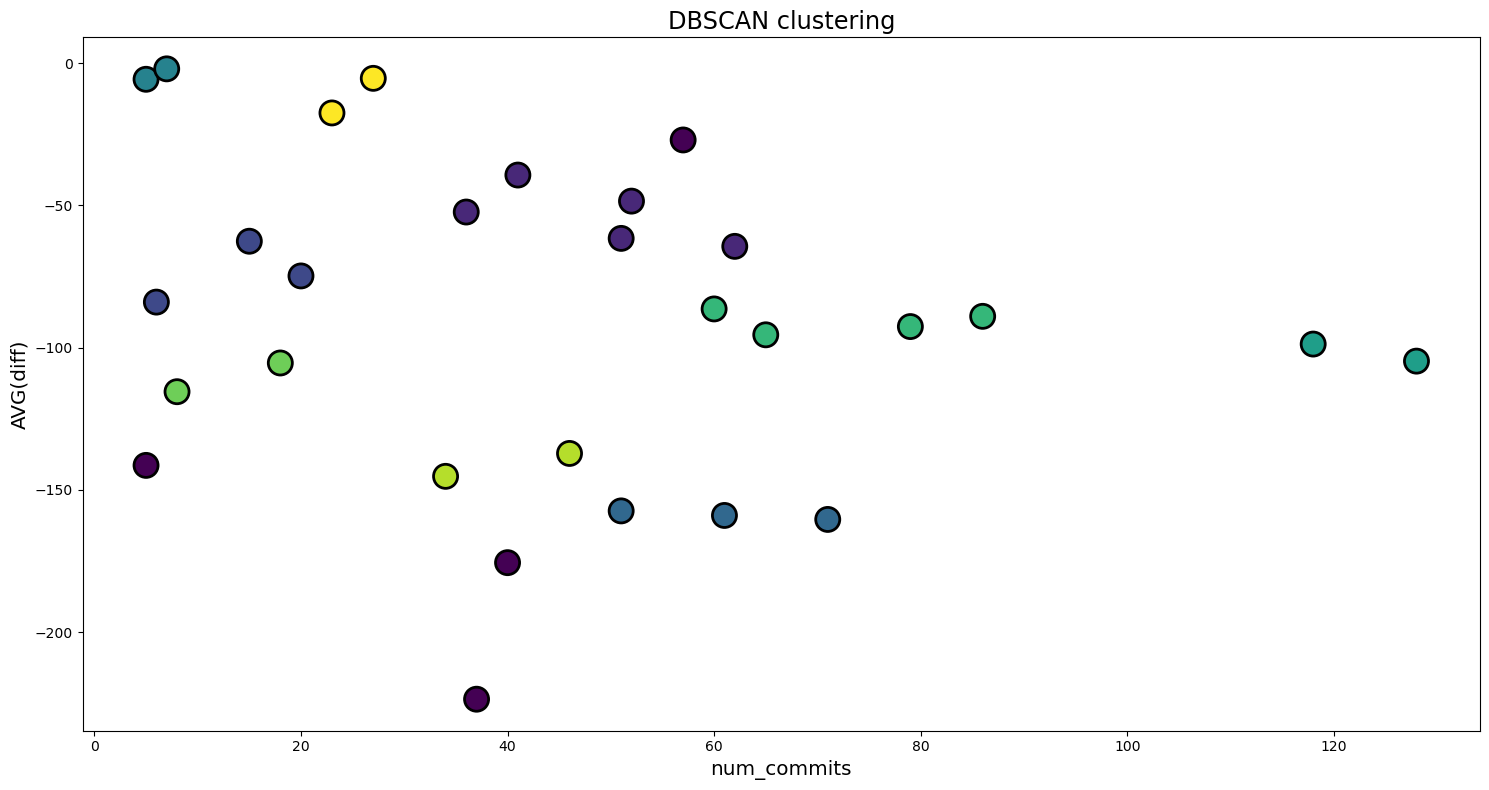

In [110]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(df['num_commits'], df['AVG(diff)'], s=300, c=labels,
           linewidths=2, edgecolors='k')
ax.set_xlabel('num_commits', fontsize='x-large')
ax.set_ylabel('AVG(diff)', fontsize='x-large')
ax.set_title('DBSCAN clustering', fontsize='xx-large')

plt.tight_layout()
plt.show()

Estimated number of clusters: 9
Estimated number of noise points: 0


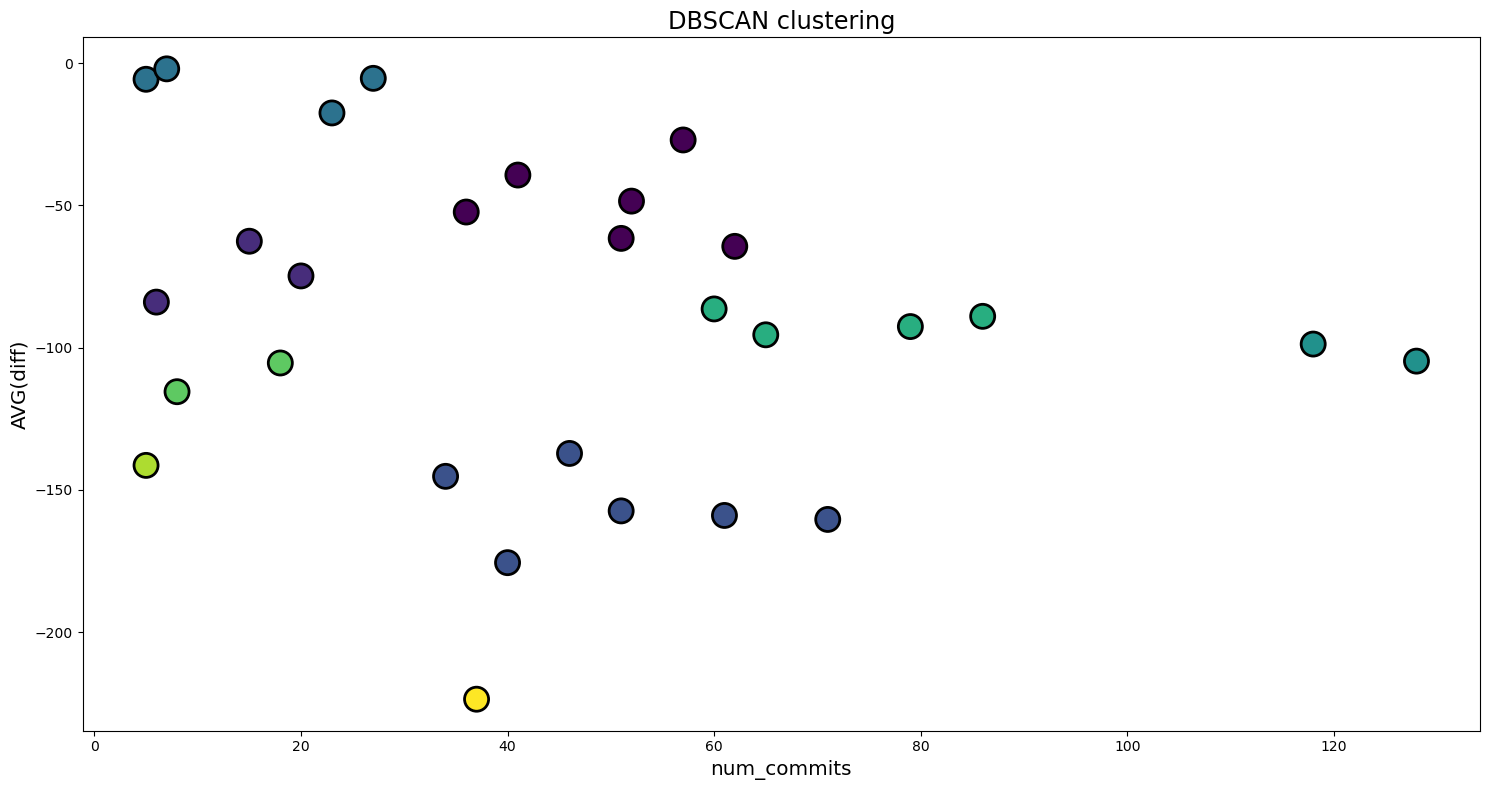

In [112]:
dbscan = DBSCAN(eps=22, min_samples=1)
dbscan.fit(x)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(df['num_commits'], df['AVG(diff)'], s=300, c=labels,
           linewidths=2, edgecolors='k')
ax.set_xlabel('num_commits', fontsize='x-large')
ax.set_ylabel('AVG(diff)', fontsize='x-large')
ax.set_title('DBSCAN clustering', fontsize='xx-large')

plt.tight_layout()
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 6


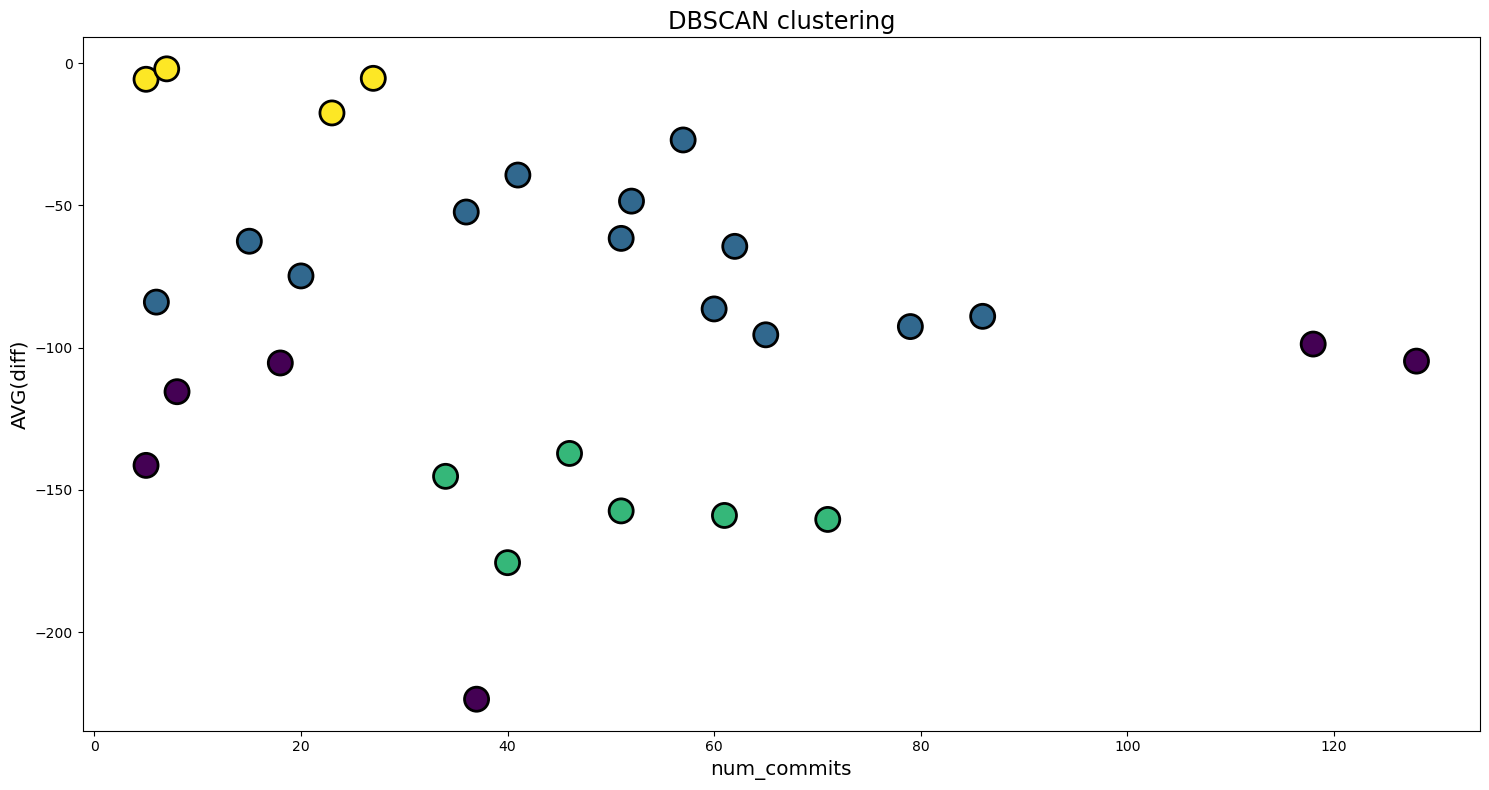

In [113]:
dbscan = DBSCAN(eps=24, min_samples=3)
dbscan.fit(x)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(df['num_commits'], df['AVG(diff)'], s=300, c=labels,
           linewidths=2, edgecolors='k')
ax.set_xlabel('num_commits', fontsize='x-large')
ax.set_ylabel('AVG(diff)', fontsize='x-large')
ax.set_title('DBSCAN clustering', fontsize='xx-large')

plt.tight_layout()
plt.show()

In [115]:
for i in range(18, 26):
    for j in range(1,3):
        labels = DBSCAN(eps=i, min_samples=j).fit(x).labels_
        print("Silhouette score for eps = " + str(i) + " and min_samples = " + str(j) + " is " + str(metrics.silhouette_score(x, labels, random_state=21)))

Silhouette score for eps = 18 and min_samples = 1 is 0.4322483665424573
Silhouette score for eps = 18 and min_samples = 2 is 0.38339641455696616
Silhouette score for eps = 19 and min_samples = 1 is 0.4322483665424573
Silhouette score for eps = 19 and min_samples = 2 is 0.38339641455696616
Silhouette score for eps = 20 and min_samples = 1 is 0.4322483665424573
Silhouette score for eps = 20 and min_samples = 2 is 0.38339641455696616
Silhouette score for eps = 21 and min_samples = 1 is 0.43613134600138975
Silhouette score for eps = 21 and min_samples = 2 is 0.4646046547648843
Silhouette score for eps = 22 and min_samples = 1 is 0.48713041554757475
Silhouette score for eps = 22 and min_samples = 2 is 0.4794129092034348
Silhouette score for eps = 23 and min_samples = 1 is 0.3952615361918726
Silhouette score for eps = 23 and min_samples = 2 is 0.3875440298477327
Silhouette score for eps = 24 and min_samples = 1 is 0.3377779489440554
Silhouette score for eps = 24 and min_samples = 2 is 0.3373

- Видим, что оптимальными параметрами являются eps = 22 и min_samples = 1

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

Text(0.5, 1.0, '8 clusters')

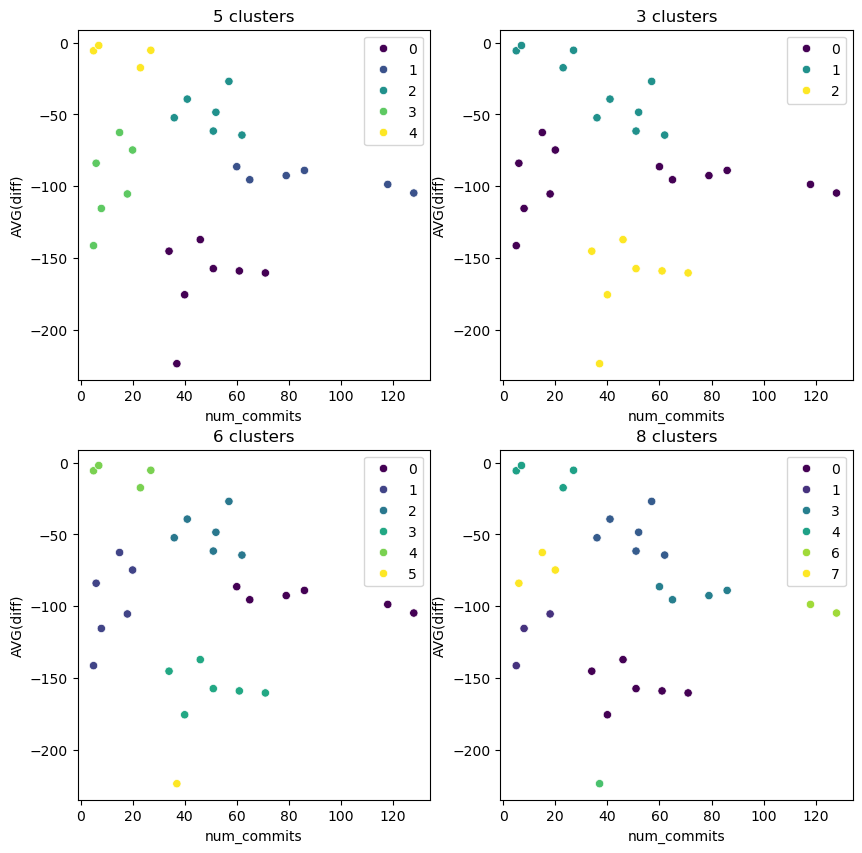

In [122]:
plt.figure(figsize=(10, 10))
ax=plt.subplot(2, 2, 1)
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = hierarchical_cluster.fit_predict(df[['num_commits', 'AVG(diff)']])
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df[['num_commits', 'AVG(diff)']], 
                palette='viridis',
                hue=data_labels).set_title('5 clusters')

ax=plt.subplot(2, 2, 2)
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hierarchical_cluster.fit_predict(df[['num_commits', 'AVG(diff)']])
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df[['num_commits', 'AVG(diff)']], 
                palette='viridis',
                hue=data_labels).set_title('3 clusters')

ax=plt.subplot(2, 2, 3)
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels = hierarchical_cluster.fit_predict(df[['num_commits', 'AVG(diff)']])
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df[['num_commits', 'AVG(diff)']], 
                palette='viridis',
                hue=data_labels).set_title('6 clusters')

ax=plt.subplot(2, 2, 4)
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, linkage='ward')
labels = hierarchical_cluster.fit_predict(df[['num_commits', 'AVG(diff)']])
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df[['num_commits', 'AVG(diff)']], 
                palette='viridis',
                hue=data_labels).set_title('8 clusters')

In [123]:
for i in range(2,10):
    labels=AgglomerativeClustering(n_clusters=i, linkage='ward').fit(df[['num_commits', 'AVG(diff)']]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df[['num_commits', 'AVG(diff)']],labels,random_state=21)))

Silhouette score for k(clusters) = 2 is 0.35902490572221984
Silhouette score for k(clusters) = 3 is 0.3390493703444805
Silhouette score for k(clusters) = 4 is 0.4448362750283643
Silhouette score for k(clusters) = 5 is 0.46383015199381467
Silhouette score for k(clusters) = 6 is 0.4527145606287827
Silhouette score for k(clusters) = 7 is 0.4865808853184314
Silhouette score for k(clusters) = 8 is 0.50779855565622
Silhouette score for k(clusters) = 9 is 0.47576869039147557


- Лучший выбор - 8 кластеров.

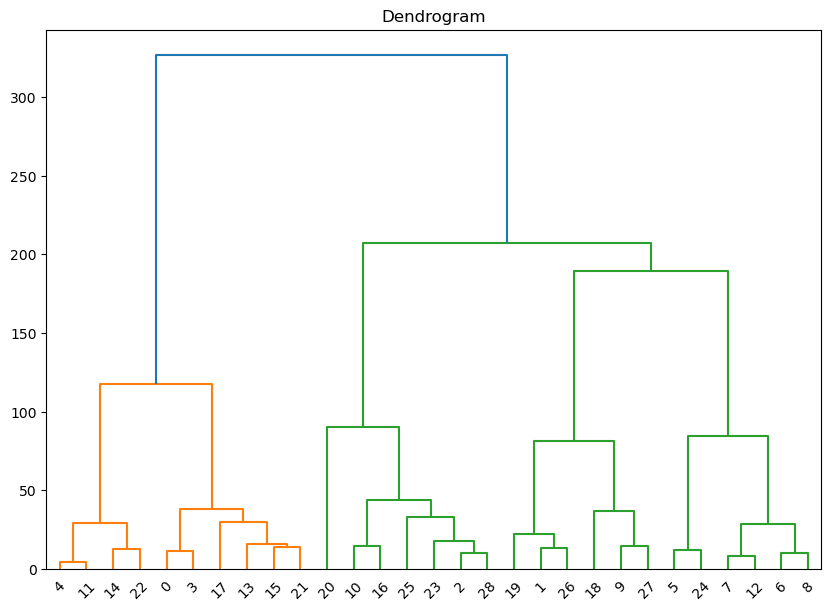

In [125]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
selected_data = df[['num_commits', 'AVG(diff)']]
clusters = shc.linkage(df[['num_commits', 'AVG(diff)']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [155]:
def optimize_clustering(model_class, params, param_name, param_range, X):
    scores = []
    
    for value in param_range:
        params[param_name] = value
        
        model = model_class(**params)
        labels = model.fit_predict(X)
        
        score = metrics.silhouette_score(X, labels)
        scores.append(score)
    
    best_index = np.argmax(scores)
    best_value = param_range[best_index]
    best_score = scores[best_index]
    
    params[param_name] = best_value
    print(f"Best {param_name} = {best_value}")
    model = model_class(**params)
    labels = model.fit_predict(X)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
    
    # Первый график показывает изменение коэффициента силуэта от значения параметра
    ax[0].plot(param_range, scores)
    ax[0].set_xlabel(f'{param_name}')
    ax[0].set_ylabel('Silhouette Score')
    ax[0].set_title(f'Silhouette Score vs {param_name}')
    
    # Второй график показывает результат кластеризации с лучшим значением параметра
    ax[1].scatter(X[:, 0], X[:, 1], c=labels, s=300,
                     linewidths=2, edgecolors='k')
    ax[1].set_xlabel('Commits')
    ax[1].set_ylabel('AVG(diff)')
    ax[1].set_title(f'Best {param_name}: {best_value}, Silhouette Score: {best_score:.3f}')
    
    return fig, ax

For KMeans:
Best n_clusters = 8


C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

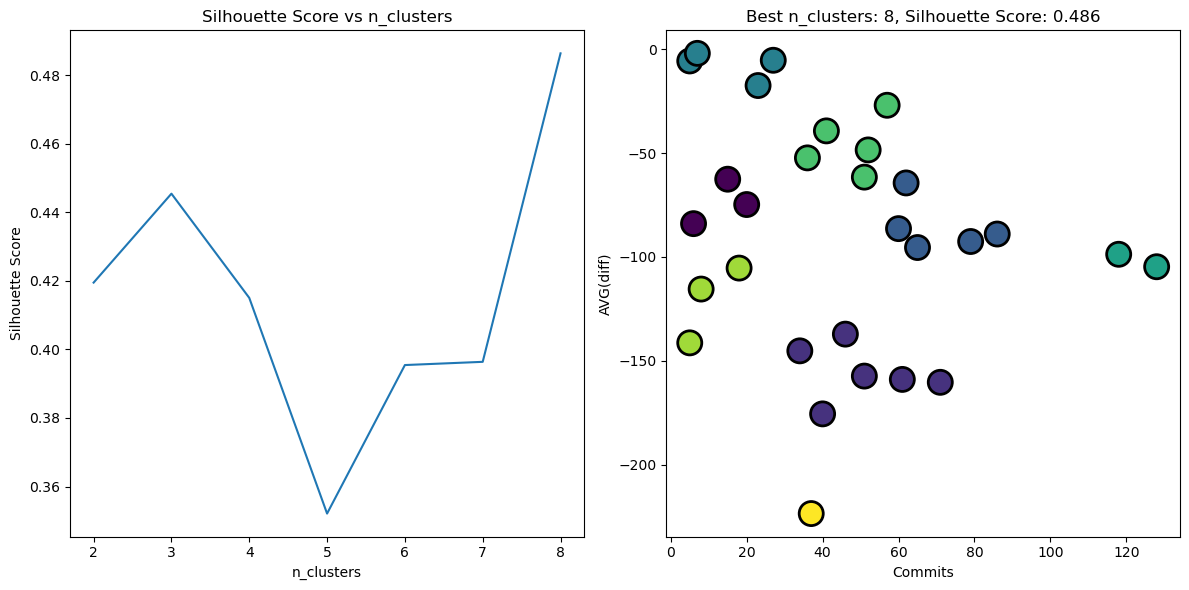

In [157]:
print('For KMeans:')
fig, ax = optimize_clustering(KMeans, {'random_state': 21}, 'n_clusters', np.arange(2, 9), df[['num_commits', 'AVG(diff)']].values)
plt.show()

For DBSCAN:
Best min_samples = 1


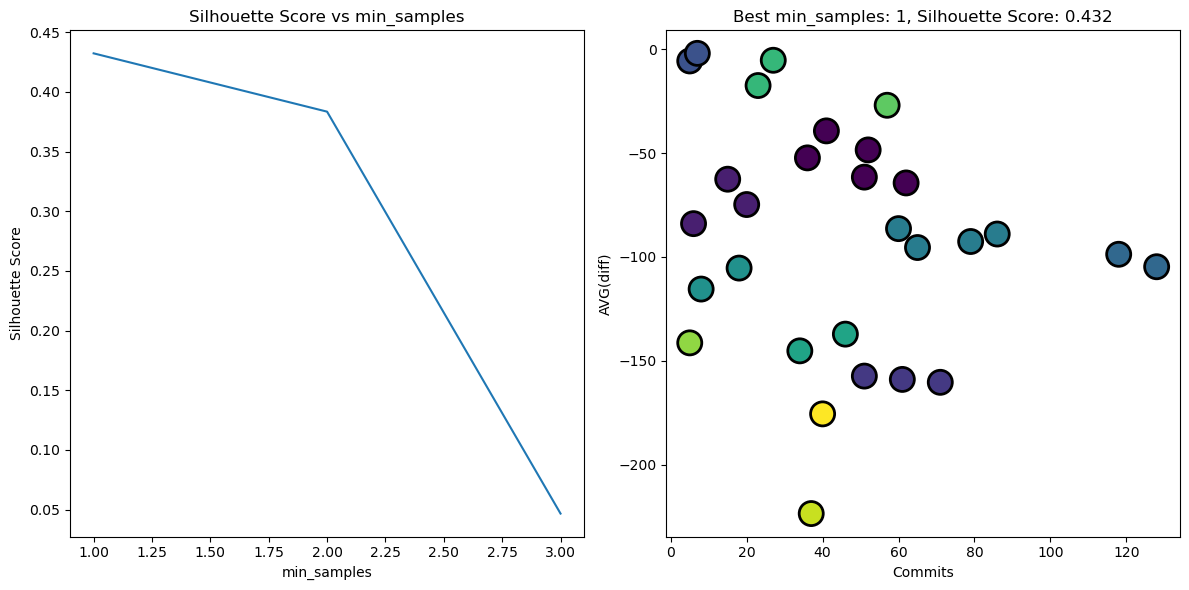

In [159]:
print('For DBSCAN:')
fig, ax = optimize_clustering(DBSCAN, {'eps': 20}, 'min_samples', np.arange(1, 4), df[['num_commits', 'AVG(diff)']].values)
plt.show()

For AgglomerativeClustering:
Best n_clusters = 8


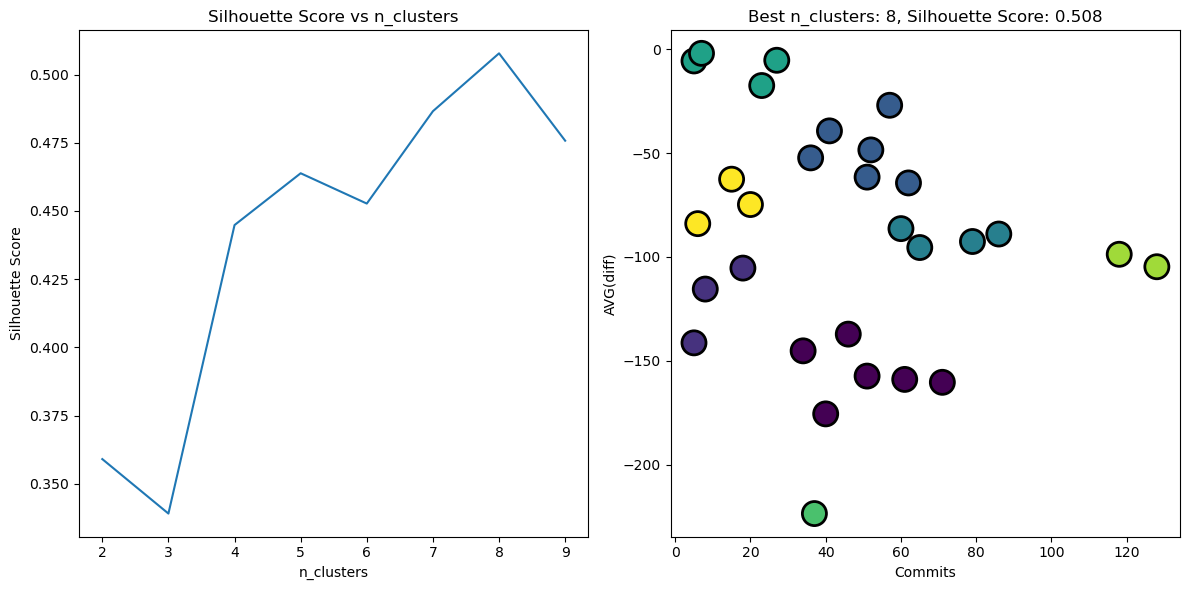

In [161]:
print('For AgglomerativeClustering:')
fig, ax = optimize_clustering(AgglomerativeClustering, {'linkage': 'ward'}, 'n_clusters', list(range(2, 10)), df[['num_commits', 'AVG(diff)']].values)
plt.show()